# Create plots for Word-Document

## First graphic

Grünanteil in den Gemeindewappen

C:\Users\Seya.Schmassmann\AppData\Local\Temp\ipykernel_14936\1912492140.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_amount_of_green['community_name'], rotation=90)


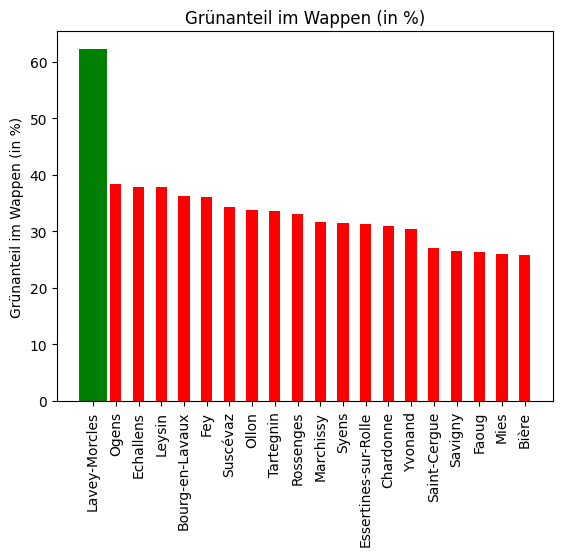

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read the data
df_1_ranking = pd.read_csv('rankings/1_ranking.csv')

# filter the data
df_amount_of_green = df_1_ranking.query("criteria2 < 40 or community_name == 'Lavey-Morcles'").sort_values(by='criteria2', ascending=False).head(20)

# plot the data
fig, ax = plt.subplots()

# manipulate the data
ax.bar(df_amount_of_green['community_name'], df_amount_of_green['criteria2'], color=np.where(df_amount_of_green['community_name'] == 'Lavey-Morcles', 'g', 'r'), width=np.where(df_amount_of_green['community_name'] == 'Lavey-Morcles', 1.2, 0.5))
ax.set_xticklabels(df_amount_of_green['community_name'], rotation=90)
ax.set_ylabel('Grünanteil im Wappen (in %)')
ax.set_title('Grünanteil im Wappen (in %)')

plt.savefig('plots/amount_of_green.png', bbox_inches='tight')

## Second graphic

Anzahl Bindestriche in den Gemeindenamen

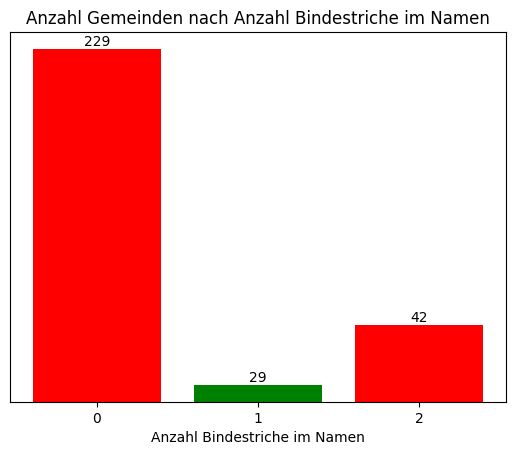

In [5]:
# count the amount of hyphens in the names
df_1_ranking['amount_hyphens'] = df_1_ranking['community_name'].str.count('-')
df_amount_hyphens = df_1_ranking.groupby('amount_hyphens').size().reset_index(name='count').sort_values(by='count', ascending=True)

# plot the data
fig, ax = plt.subplots()

# manipulate the data
bars = ax.bar(df_amount_hyphens['amount_hyphens'], df_amount_hyphens['count'], color=np.where(df_amount_hyphens['amount_hyphens'] == 1, 'g', 'r'))

# adding labels to the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            '%d' % int(height),
            ha='center', va='bottom')

ax.set_xticks(df_amount_hyphens['amount_hyphens'])
ax.get_yaxis().set_visible(False)
ax.set_yscale('log')
ax.set_ylabel('Anzahl Gemeinden')
ax.set_xlabel('Anzahl Bindestriche im Namen')
ax.set_title('Anzahl Gemeinden nach Anzahl Bindestriche im Namen')

plt.savefig('plots/amount_hyphens.png', bbox_inches='tight')